In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
os.chdir(r"C:\Users\DELL E7490\gcet")
path_data = os.getcwd()

In [9]:
train_data = pd.read_csv('train.csv')
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
test_data = pd.read_csv('test.csv')
test_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [11]:
train_data.shape


(550068, 12)

In [12]:
test_data.shape

(233599, 11)

In [13]:
test_data.info()
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 5

In [14]:
train_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [15]:
test_data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


<Axes: >

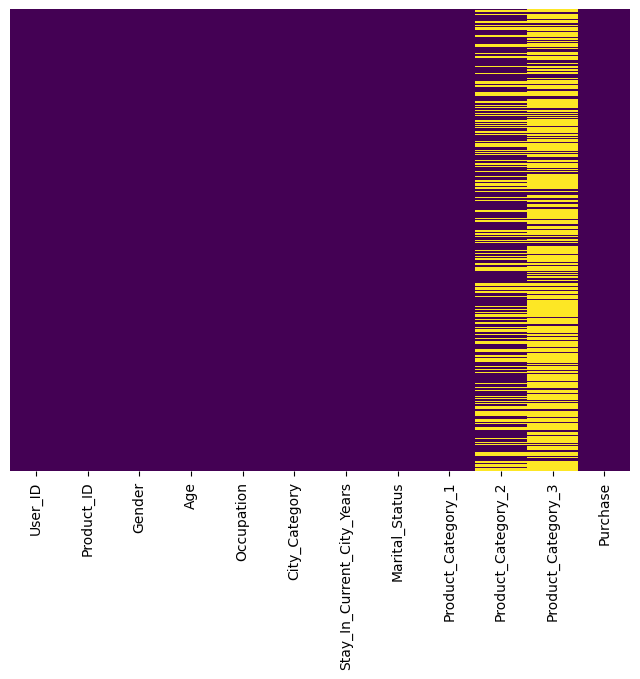

In [16]:
print(train_data.isnull().sum())
# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64


<Axes: >

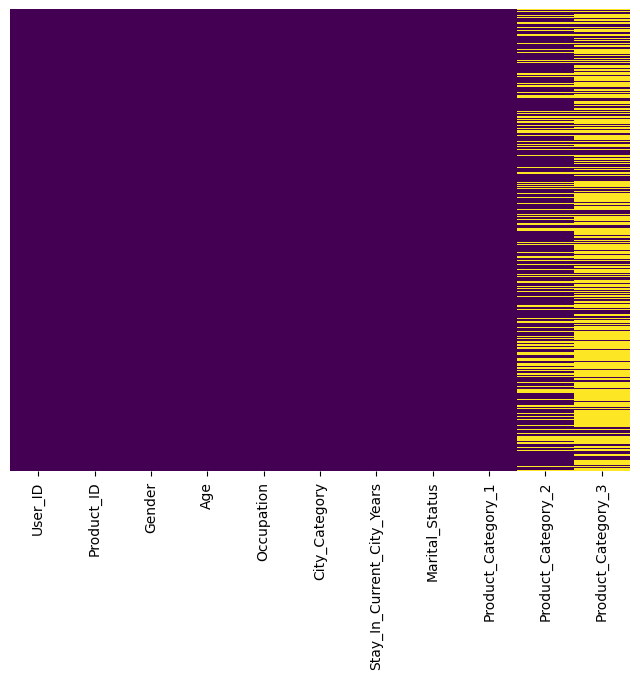

In [17]:
print(test_data.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(8,6))
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
train_data=train_data.drop(['User_ID','Product_ID'], axis=1)
train_data=train_data.fillna(0)
train_data[['Product_Category_2']]=train_data[['Product_Category_2']].astype(int)
train_data[['Product_Category_3']]=train_data[['Product_Category_3']].astype(int)
train_data.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,0,0,8370
1,F,0-17,10,A,2,0,1,6,14,15200
2,F,0-17,10,A,2,0,12,0,0,1422
3,F,0-17,10,A,2,0,12,14,0,1057
4,M,55+,16,C,4+,0,8,0,0,7969


In [19]:
test_data=test_data.drop(['User_ID','Product_ID'], axis=1)
test_data=test_data.fillna(0)
test_data[['Product_Category_2']]=test_data[['Product_Category_2']].astype(int)
test_data[['Product_Category_3']]=test_data[['Product_Category_3']].astype(int)
test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11,0
1,M,26-35,17,C,0,0,3,5,0
2,F,36-45,1,B,4+,1,5,14,0
3,F,36-45,1,B,4+,1,4,9,0
4,F,26-35,1,C,1,0,4,5,12


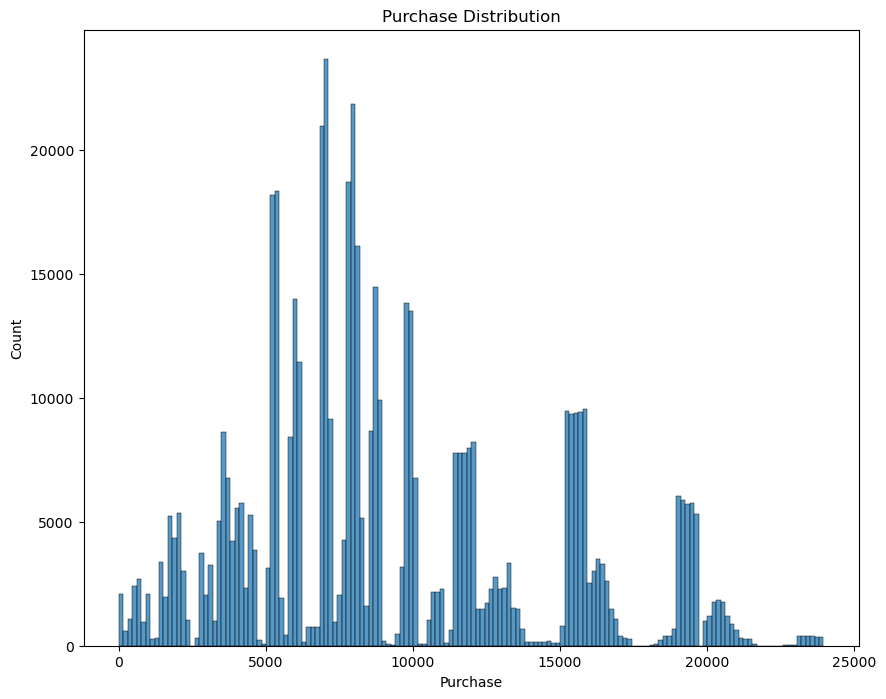

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(train_data["Purchase"])
plt.title("Purchase Distribution")
plt.show()

In [21]:
train_data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

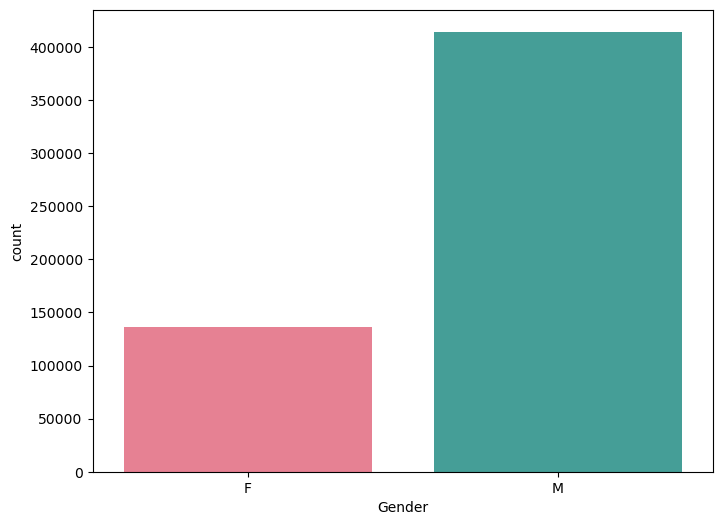

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Gender', data = train_data, palette ='husl')
plt.show()

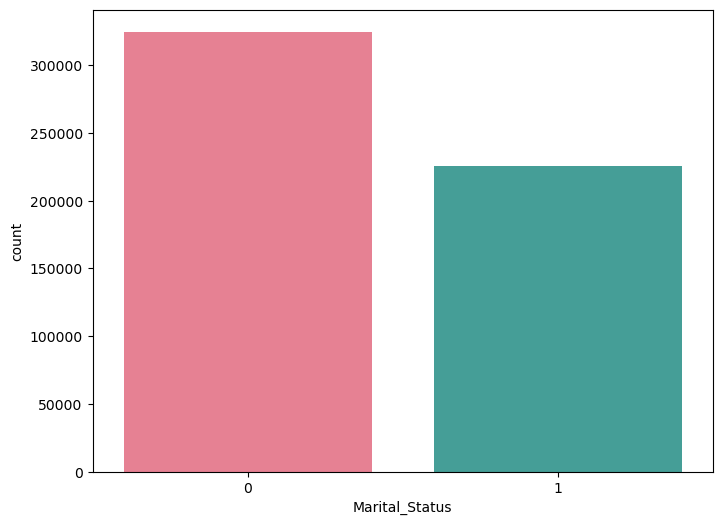

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Marital_Status', data = train_data, palette ='husl')
plt.show()

In [24]:
train_data.groupby("Marital_Status").mean()["Purchase"]

C:\Users\DELL E7490\AppData\Local\Temp\ipykernel_12696\1608819820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

C:\Users\DELL E7490\AppData\Local\Temp\ipykernel_12696\1984574327.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')


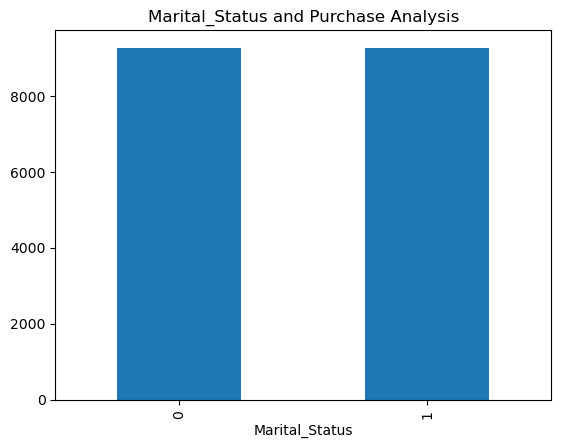

In [25]:
train_data.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()

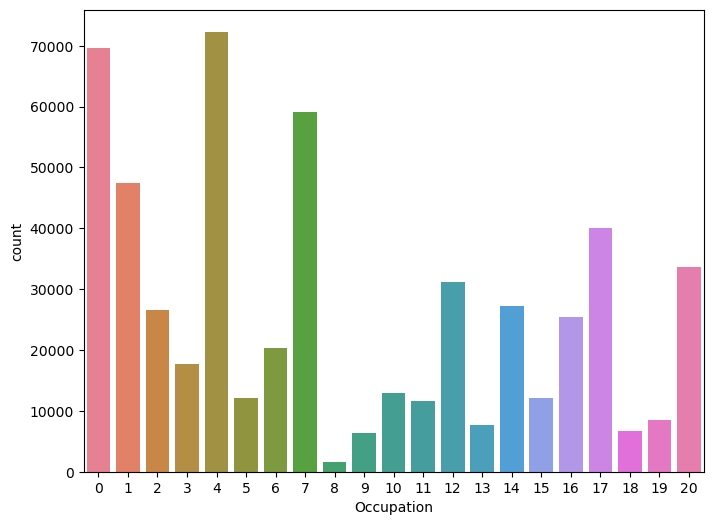

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Occupation', data = train_data, palette ='husl')
plt.show()

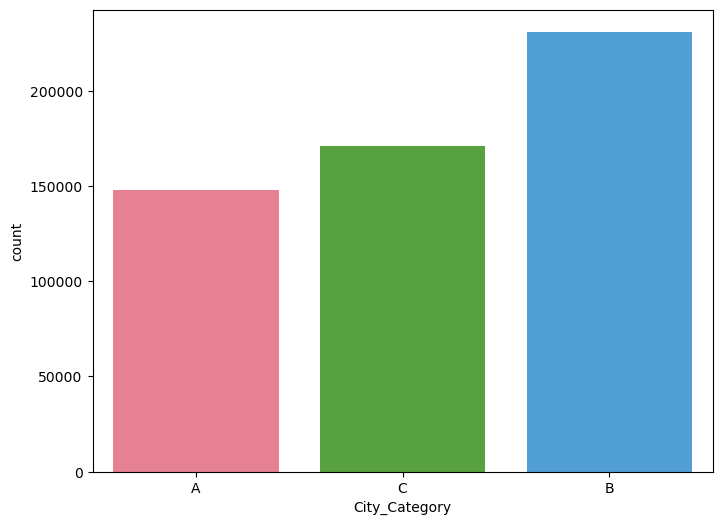

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x ='City_Category', data = train_data, palette ='husl')
plt.show()

C:\Users\DELL E7490\AppData\Local\Temp\ipykernel_12696\3074566119.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')


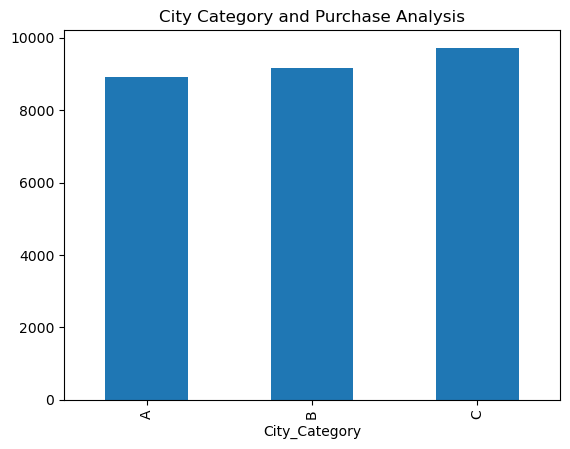

In [28]:
train_data.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()

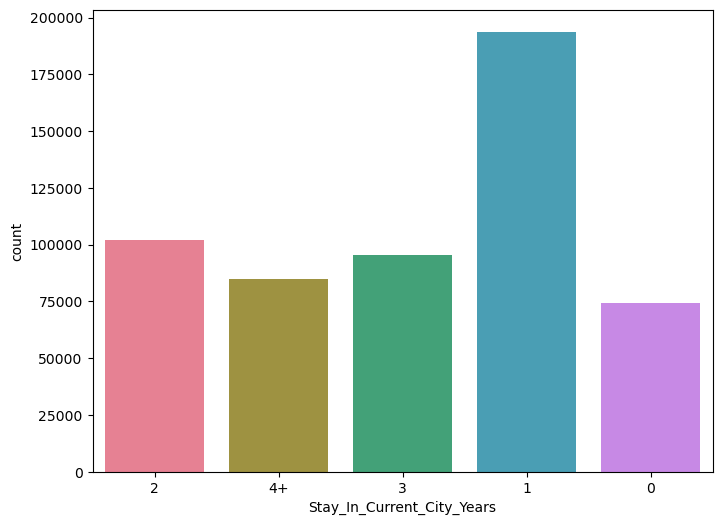

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Stay_In_Current_City_Years', data = train_data, palette ='husl')
plt.show()

<Axes: ylabel='count'>

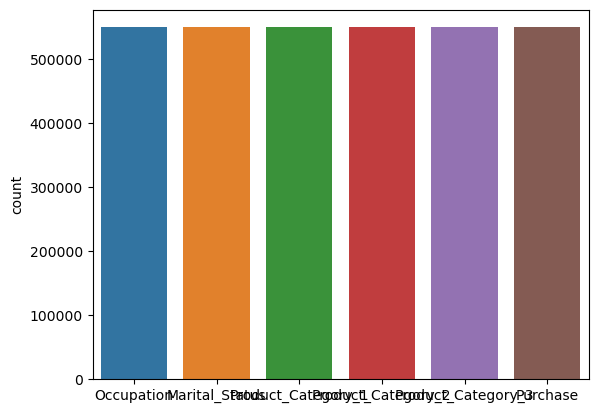

In [30]:
sns.countplot(train_data)

C:\Users\DELL E7490\AppData\Local\Temp\ipykernel_12696\1576965946.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")


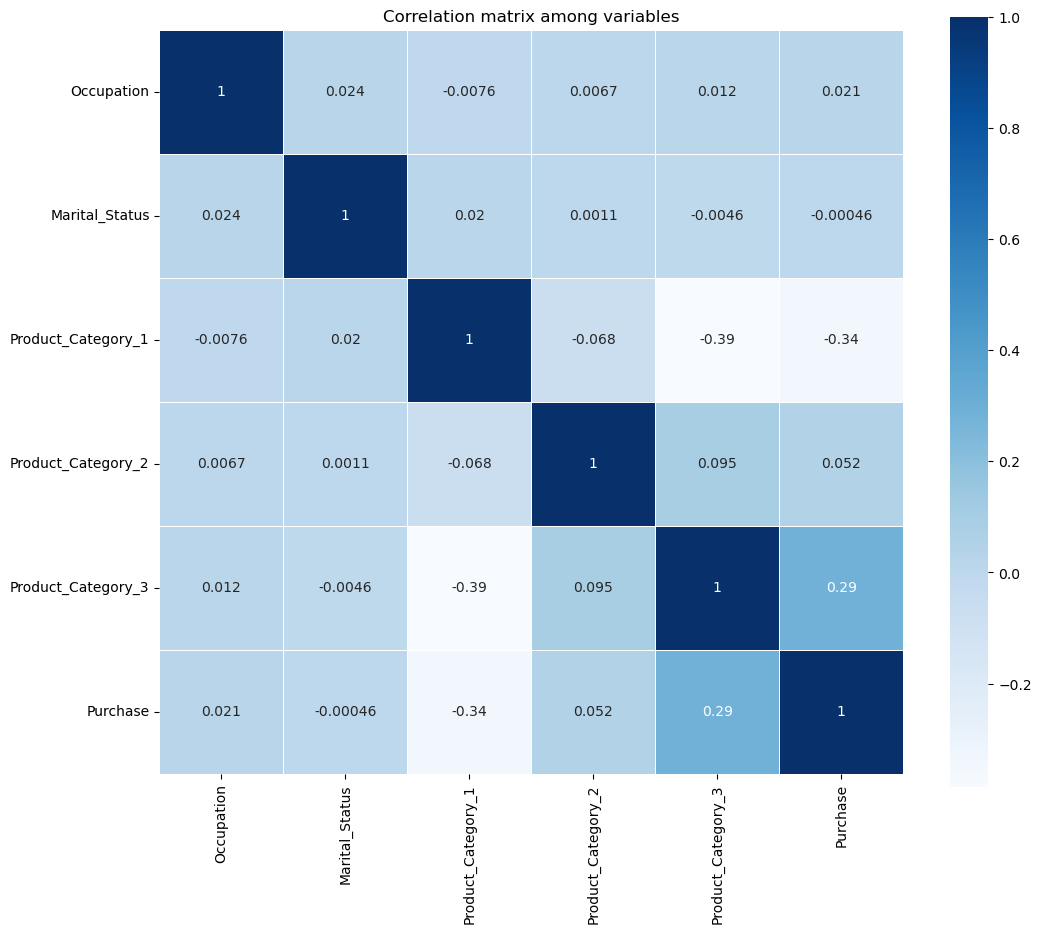

In [31]:
# Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(train_data.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

In [32]:
#Encoding the categorical variables for train data*/
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
train_data['Gender'] = lr.fit_transform(train_data['Gender'])
train_data['Age'] = lr.fit_transform(train_data['Age'])
train_data['City_Category'] = lr.fit_transform(train_data['City_Category'])
train_data['Stay_In_Current_City_Years'] = train_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
train_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0,0,8370
1,0,0,10,0,2,0,1,6,14,15200
2,0,0,10,0,2,0,12,0,0,1422
3,0,0,10,0,2,0,12,14,0,1057
4,1,6,16,2,4,0,8,0,0,7969


In [33]:
#Encoding the categorical variables for test data

test_data['Gender'] = lr.fit_transform(test_data['Gender'])
test_data['Age'] = lr.fit_transform(test_data['Age'])
test_data['City_Category'] = lr.fit_transform(test_data['City_Category'])
test_data['Stay_In_Current_City_Years'] = test_data['Stay_In_Current_City_Years'].replace(to_replace="4+",value="4")
test_data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1,4,7,1,2,1,1,11,0
1,1,2,17,2,0,0,3,5,0
2,0,3,1,1,4,1,5,14,0
3,0,3,1,1,4,1,4,9,0
4,0,2,1,2,1,0,4,5,12


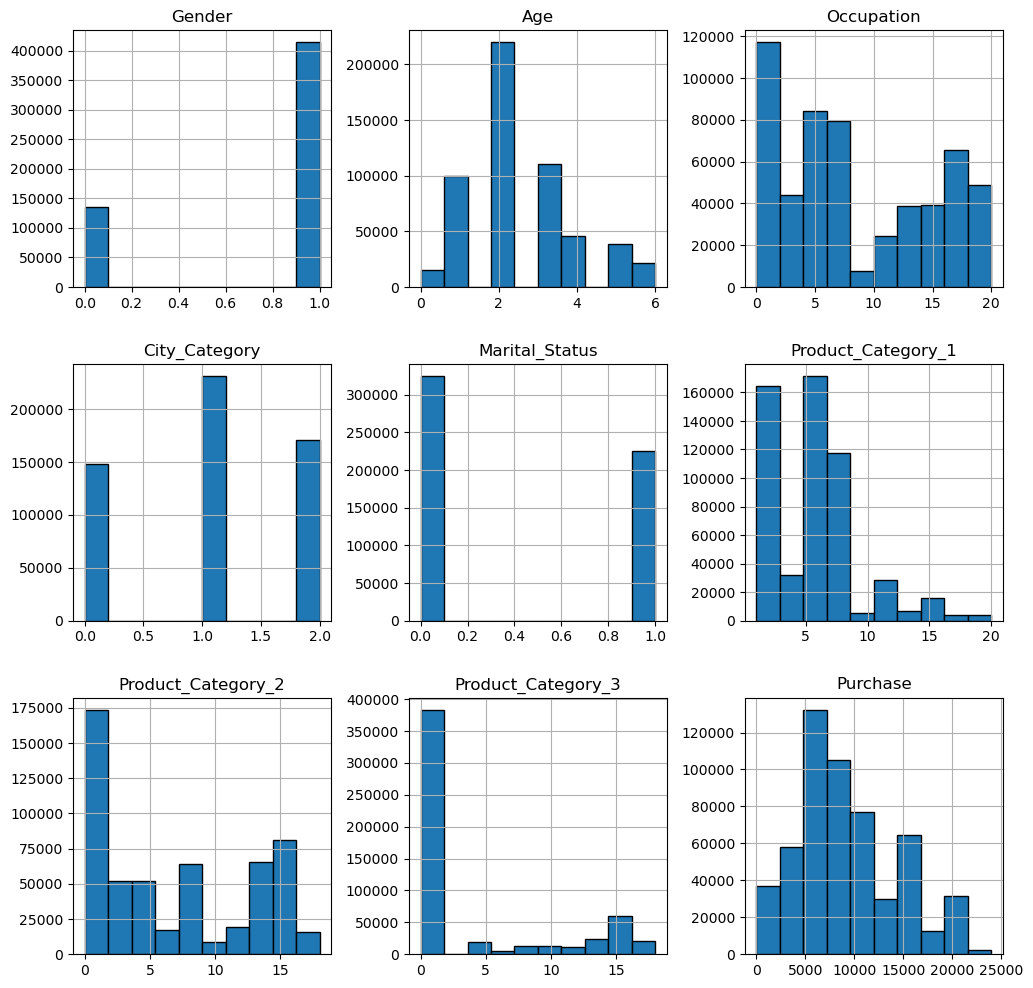

In [34]:
train_data.hist(edgecolor='black',figsize=(12,12));

In [35]:
test_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [36]:
train_data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

size = train_data.['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

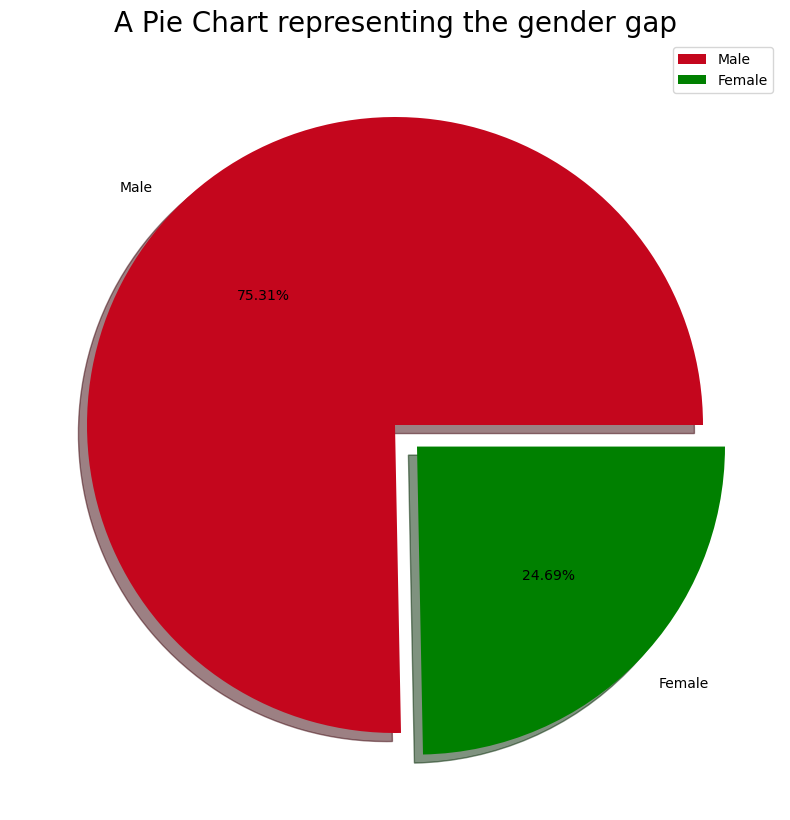

In [37]:
size = train_data['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [38]:
#label encoding
df_Gender = pd.get_dummies(train_data['Gender'])
df_Age = pd.get_dummies(train_data['Age'])
df_City_Category = pd.get_dummies(train_data['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(train_data['Stay_In_Current_City_Years'])

data_final= pd.concat([train_data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,...,5,6,0,1,2,0,1,2,3,4
0,0,0,10,0,2,0,3,0,0,8370,...,0,0,1,0,0,0,0,1,0,0
1,0,0,10,0,2,0,1,6,14,15200,...,0,0,1,0,0,0,0,1,0,0
2,0,0,10,0,2,0,12,0,0,1422,...,0,0,1,0,0,0,0,1,0,0
3,0,0,10,0,2,0,12,14,0,1057,...,0,0,1,0,0,0,0,1,0,0
4,1,6,16,2,4,0,8,0,0,7969,...,0,1,0,0,1,0,0,0,0,1


In [39]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,0,1,0,1,...,5,6,0,1,2,0,1,2,3,4
0,10,0,3,0,0,8370,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6,14,15200,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0,0,1422,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14,0,1057,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0,0,7969,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,0,0,368,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,0,0,371,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,0,0,137,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,0,0,365,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [40]:
#independent data sets
X = train_data.drop("Purchase",axis=1)
y = train_data['Purchase']
#Splitting the model into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [41]:
#Standardization of dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor  = LinearRegression()
regressor .fit(X_train_scaled,y_train)

LinearRegression()

In [43]:
y_pred = regressor.predict(X_test_scaled)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [45]:
r2_score(y_test, y_pred)

0.15191466893823047

In [46]:
mean_absolute_error(y_test, y_pred)

3532.081650875999

In [47]:
mean_squared_error(y_test, y_pred)

21398226.092867162

In [48]:
from math import sqrt
print("RMSE of Linear Regression Model on test data is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model on test data is  4625.821666781715


In [49]:
#decison treeregressor
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [50]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [51]:
dt_y_pred = regressor.predict(X_test)

In [52]:
mean_absolute_error(y_test, dt_y_pred)

2368.038704401106

In [53]:
mean_squared_error(y_test, dt_y_pred)

11256280.006286144

In [54]:
r2_score(y_test, dt_y_pred)

0.5538748906463186

In [55]:
print("RMSE of Decision Tree Model on test data is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Model on test data is  3355.038003702215


In [56]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [57]:
rfregressor.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [52]:
rf_y_pred = rfregressor.predict(X_test_scaled)

In [53]:
r2_score(y_test, rf_y_pred)

0.6190412416384221

In [54]:
print("RMSE of Random Forest Model on test data is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Random Forest Model on test data is  3100.331205059011


In [55]:
#XGBoost Regressor
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

In [56]:
xgb_reg.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
xgb_y_pred = xgb_reg.predict(X_test_scaled)

In [58]:
r2_score(y_test, xgb_y_pred)

0.6729483848909161

In [59]:
print("RMSE of XGBoost Model on test data is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Model on test data is  2872.6139113662816


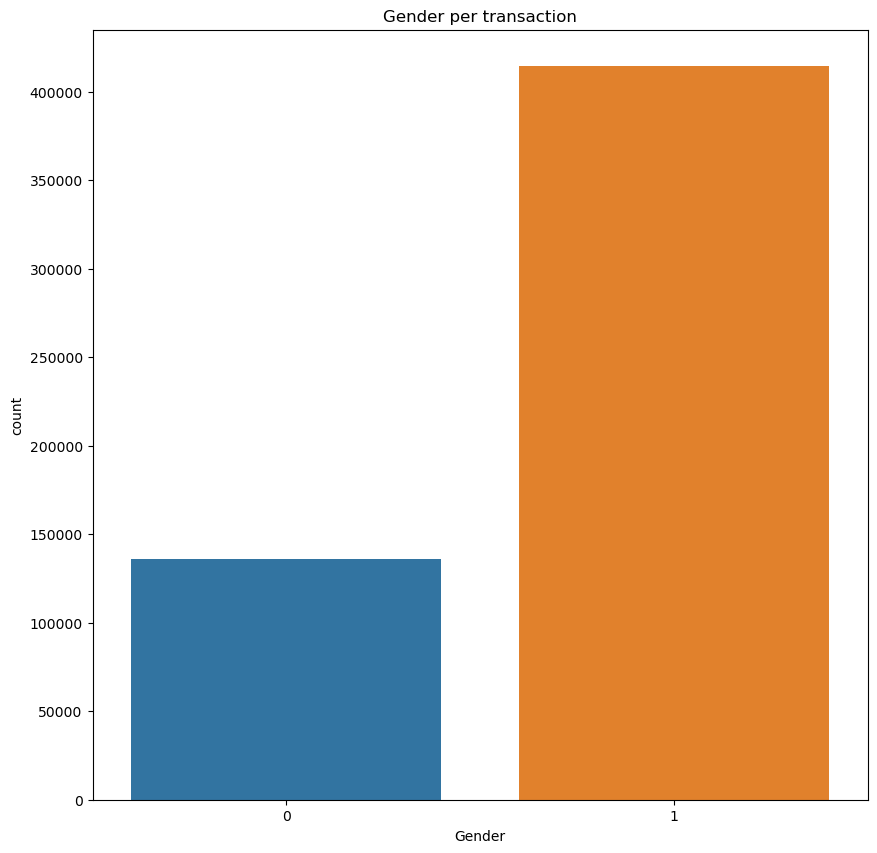

In [74]:
sns.countplot(x=train_data.Gender)
plt.title('Gender per transaction');

NameError: name 'x_train' is not defined